## PATIENT - DOCTOR DATASET

In [2]:
import pandas as pd
import numpy as np
from datasets import Dataset, DatasetDict, load_dataset

dataset = load_dataset("Postzeun/Patient-Doctor")

Resolving data files:   0%|          | 0/271 [00:00<?, ?it/s]

In [3]:
dataset

DatasetDict({
    train: Dataset({
        features: ['text'],
        num_rows: 60640
    })
})

In [4]:
text_lines = dataset['train']['text']

data = {'text': [], 'label': []}

patient_text = []
doctor_text = []

for line in text_lines:
  if line.startswith('P:'):
    line = line.replace('P:', '').strip()
    label = 0
    patient_text.append(line)
  elif line.startswith('D:'):
    line = line.replace('D:', '').strip()
    label = 1
    doctor_text.append(line)
  else:
    continue
  data['text'].append(line)
  data['label'].append(label)

In [5]:
df1 = pd.DataFrame({'text': data['text'], 'label': data['label']})
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26538 entries, 0 to 26537
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    26538 non-null  object
 1   label   26538 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.8+ KB


In [6]:
df1['label'].value_counts()

1    13342
0    13196
Name: label, dtype: int64

In [8]:
import os
PROJECT_PATH = os.getcwd()
df2 = pd.read_csv(os.path.join(PROJECT_PATH, 'dataset/pulsar_contents.csv'))
df2.rename(columns={"bio": "text"}, inplace=True)
df2['label'] = 2
df2 = df2[['text', 'label']]
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13345 entries, 0 to 13344
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    8669 non-null   object
 1   label   13345 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 208.6+ KB


In [9]:
# With three labels P - D - N
frames = [df1, df2]

df = pd.concat(frames)

In [10]:
# pd.isna(df['text']).value_counts()
df.dropna(inplace=True)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26538 entries, 0 to 26537
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   text    26538 non-null  object
 1   label   26538 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 414.8+ KB


#### Check non-latin characters

In [11]:
LATIN_1_CHARS = (
    ('\xe2\x80\x99', "'"),
    ('\xc3\xa9', 'e'),
    ('\xe2\x80\x90', '-'),
    ('\xe2\x80\x91', '-'),
    ('\xe2\x80\x92', '-'),
    ('\xe2\x80\x93', '-'),
    ('\xe2\x80\x94', '-'),
    ('\xe2\x80\x94', '-'),
    ('\xe2\x80\x98', "'"),
    ('\xe2\x80\x9b', "'"),
    ('\xe2\x80\x9c', '"'),
    ('\xe2\x80\x9c', '"'),
    ('\xe2\x80\x9d', '"'),
    ('\xe2\x80\x9e', '"'),
    ('\xe2\x80\x9f', '"'),
    ('\xe2\x80\xa6', '...'),
    ('\xe2\x80\xb2', "'"),
    ('\xe2\x80\xb3', "'"),
    ('\xe2\x80\xb4', "'"),
    ('\xe2\x80\xb5', "'"),
    ('\xe2\x80\xb6', "'"),
    ('\xe2\x80\xb7', "'"),
    ('\xe2\x81\xba', "+"),
    ('\xe2\x81\xbb', "-"),
    ('\xe2\x81\xbc', "="),
    ('\xe2\x81\xbd', "("),
    ('\xe2\x81\xbe', ")")
)


def clean_latin1(data):
    try:
        return data.encode('utf-8')
    except UnicodeDecodeError:
        data = data.decode('iso-8859-1')
        for _hex, _char in LATIN_1_CHARS:
            data = data.replace(_hex, _char)
        return data.encode('utf8')

In [12]:
error = []
for text in df['text'].values:
  try:
    text = clean_latin1(text)
    # text.encode(encoding='utf-8').decode('ascii')
  except:
    print(f'error for {text}')
    error.append(text)
  # text.encode(encoding='utf-8').decode('ascii')

print(len(error))

0


<AxesSubplot: >

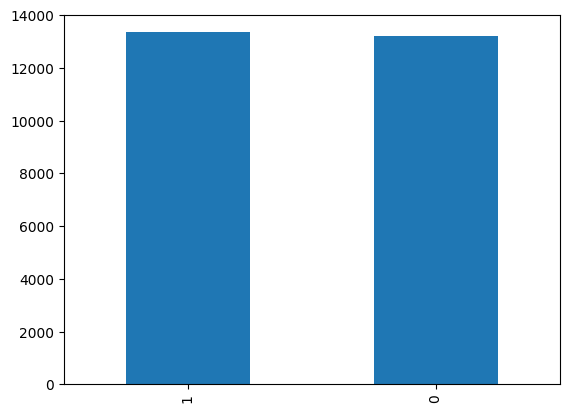

In [13]:
df['label'].value_counts().plot(kind='bar')

In [14]:
train, validate, test = \
              np.split(df.sample(frac=1, random_state=42).reset_index(drop=True), 
                       [int(.6*len(df)), int(.8*len(df))])

In [16]:
# df.to_csv('patient_doctor_two_labels.csv', index=False)

## Hugging Face login

In [24]:
from huggingface_hub import notebook_login

notebook_login()

In [25]:
train_ds = Dataset.from_pandas(train)
validation_ds = Dataset.from_pandas(validate)
test_ds = Dataset.from_pandas(test)

ddict = DatasetDict({
    "train": train_ds,   # split1_ds is an instance of `datasets.Dataset`
    "validation": validation_ds,
    "test": test_ds,
})
ddict.push_to_hub("LukeGPT88/text-classification-dataset")

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/25 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

Uploading the dataset shards:   0%|          | 0/1 [00:00<?, ?it/s]

Creating parquet from Arrow format:   0%|          | 0/9 [00:00<?, ?ba/s]

README.md:   0%|          | 0.00/522 [00:00<?, ?B/s]

CommitInfo(commit_url='https://huggingface.co/datasets/LukeGPT88/text-classification-dataset/commit/54d11259db638cd608b8eec2a1863e716e36dccc', commit_message='Upload dataset', commit_description='', oid='54d11259db638cd608b8eec2a1863e716e36dccc', pr_url=None, pr_revision=None, pr_num=None)